In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode
import shutil
import glob
from skimage import metrics
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
ground = "with_ground"
# ground = "no_ground"
seq_name = f"160317_moonbaby1_{ground}"
data_path = os.path.join("/home/lei/rajrup/KinectStream/Scripts/Experiments/output/", seq_name)

In [3]:
gt_vs_kpcull_low = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c15m_d_yuv30m_fps30_w_kpcull.csv'))
gt_vs_kpcull_low_l3 = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c15m_d_yuv30m_fps30_w_kpcull_l3.csv'))
gt_vs_kpcull_low_l5 = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c15m_d_yuv30m_fps30_w_kpcull_l5.csv'))
gt_vs_kpcull_low_l10 = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c15m_d_yuv30m_fps30_w_kpcull_l10.csv'))
gt_vs_kpcull_high = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c100m_d_yuv200m_fps30_w_kpcull.csv'))
gt_vs_pcull_low = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c15m_d_yuv30m_fps30_w_pcull.csv'))
gt_vs_pcull_high = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c100m_d_yuv200m_fps30_w_pcull.csv'))
gt_vs_nocull_low = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c15m_d_yuv30m_fps30_wo_cull.csv'))
gt_vs_nocull_high = pd.read_csv(os.path.join(data_path, 'gt_vs_o3d_nvenc_c100m_d_yuv200m_fps30_wo_cull.csv'))

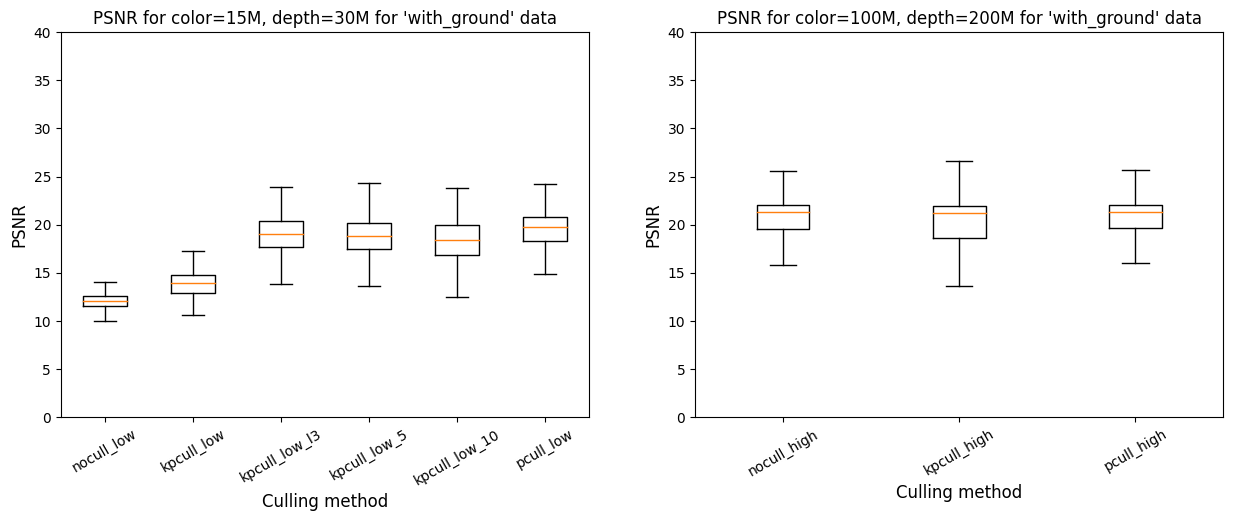

In [4]:
# boxplot for PSNR for all data
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title(f"PSNR for color=15M, depth=30M for '{ground}' data")
if ground == "with_ground":
    plt.boxplot([gt_vs_nocull_low['PSNR'], gt_vs_kpcull_low['PSNR'], gt_vs_kpcull_low_l3['PSNR'], gt_vs_kpcull_low_l5['PSNR'], gt_vs_kpcull_low_l10['PSNR'] ,gt_vs_pcull_low['PSNR']], labels=['nocull_low', 'kpcull_low', 'kpcull_low_l3', 'kpcull_low_5', 'kpcull_low_10', 'pcull_low'], showfliers=False)
else:
    plt.boxplot([gt_vs_nocull_low['PSNR'], gt_vs_kpcull_low['PSNR'], gt_vs_pcull_low['PSNR']], labels=['nocull_low', 'kpcull_low', 'pcull_low'], showfliers=False)
plt.ylabel('PSNR', fontsize=12)
plt.xlabel('Culling method', fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0.0, 40.0)
plt.subplot(122)
plt.title(f"PSNR for color=100M, depth=200M for '{ground}' data")
plt.boxplot([gt_vs_nocull_high['PSNR'], gt_vs_kpcull_high['PSNR'], gt_vs_pcull_high['PSNR']], labels=['nocull_high', 'kpcull_high', 'pcull_high'], showfliers=False)
plt.ylabel('PSNR', fontsize=12)
plt.xlabel('Culling method', fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0.0, 40.0)
plt.show()

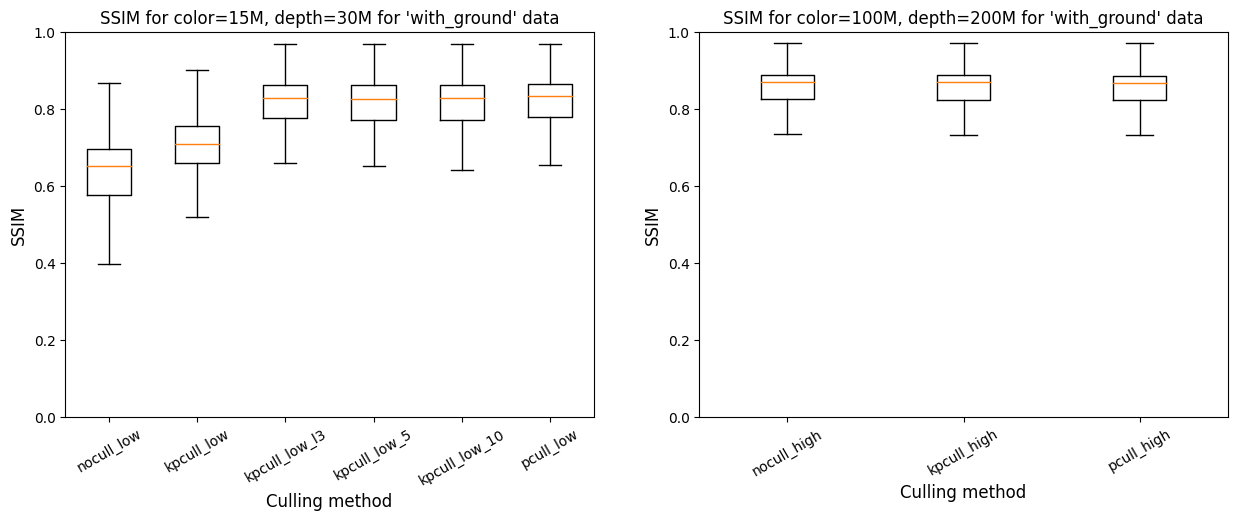

In [5]:
# boxplot for SSIM for all data
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title(f"SSIM for color=15M, depth=30M for '{ground}' data")
if ground == "with_ground":
    plt.boxplot([gt_vs_nocull_low['SSIM'], gt_vs_kpcull_low['SSIM'], gt_vs_kpcull_low_l3['SSIM'], gt_vs_kpcull_low_l5['SSIM'], gt_vs_kpcull_low_l10['SSIM'], gt_vs_pcull_low['SSIM']], labels=['nocull_low', 'kpcull_low', 'kpcull_low_l3', 'kpcull_low_5', 'kpcull_low_10', 'pcull_low'], showfliers=False)
else:
    plt.boxplot([gt_vs_nocull_low['SSIM'], gt_vs_kpcull_low['SSIM'], gt_vs_pcull_low['SSIM']], labels=['nocull_low', 'kpcull_low', 'pcull_low'], showfliers=False)
plt.ylabel('SSIM', fontsize=12)
plt.ylim(0.0, 1.0)
plt.xlabel('Culling method', fontsize=12)
plt.xticks(rotation=30)
plt.subplot(122)
plt.title(f"SSIM for color=100M, depth=200M for '{ground}' data")
plt.boxplot([gt_vs_nocull_high['SSIM'], gt_vs_kpcull_high['SSIM'], gt_vs_pcull_high['SSIM']], labels=['nocull_high', 'kpcull_high', 'pcull_high'], showfliers=False)
plt.ylabel('SSIM', fontsize=12)
plt.xlabel('Culling method', fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0.0, 1.0)
plt.show()

In [25]:
pcull_vs_kpcull_low = pd.read_csv(os.path.join(data_path, 'pcull_vs_o3d_nvenc_c15m_d_yuv30m_fps30_w_kpcull.csv'))
pcull_vs_kpcull_high = pd.read_csv(os.path.join(data_path, 'pcull_vs_o3d_nvenc_c100m_d_yuv200m_fps30_w_kpcull.csv'))

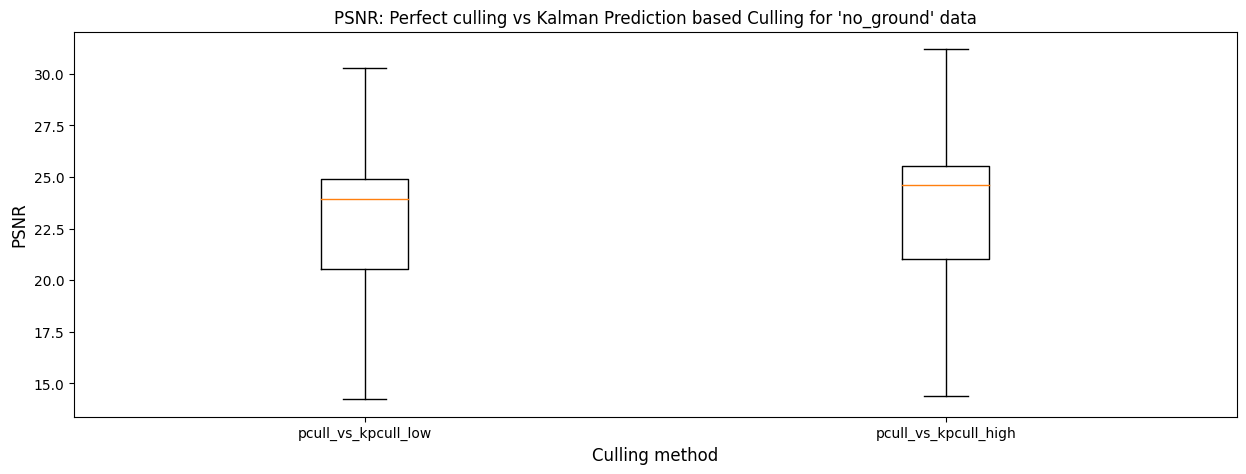

In [18]:
# boxplot for PSNR for all data
plt.figure(figsize=(15, 5))
plt.title(f"PSNR: Perfect culling vs Kalman Prediction based Culling for '{ground}' data")
plt.boxplot([pcull_vs_kpcull_low['PSNR'], pcull_vs_kpcull_high['PSNR']], labels=['pcull_vs_kpcull_low', 'pcull_vs_kpcull_high'], showfliers=False)
plt.ylabel('PSNR', fontsize=12)
plt.xlabel('Culling method', fontsize=12)
plt.show()

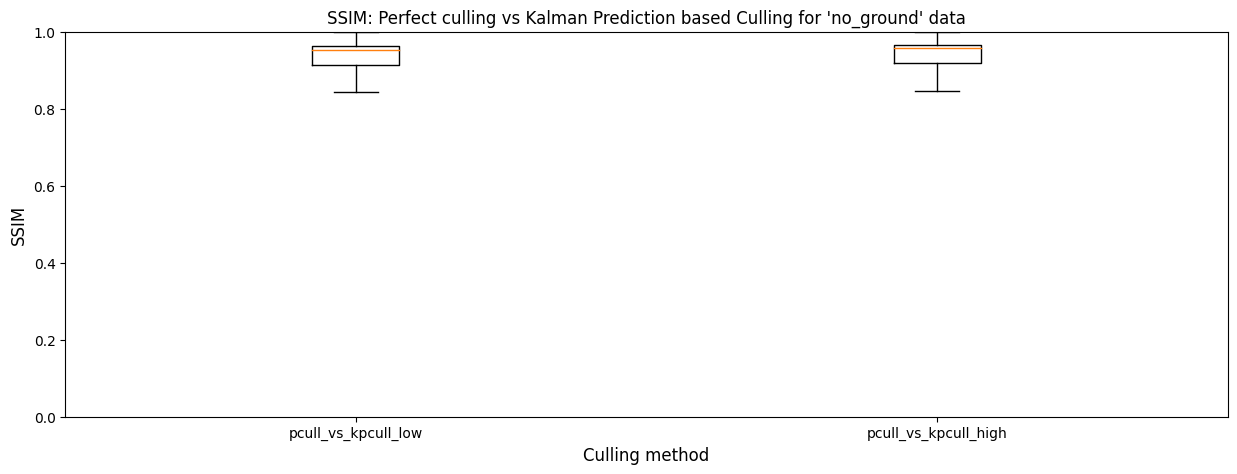

In [19]:
# boxplot for SSIM for all data
plt.figure(figsize=(15, 5))
plt.title(f"SSIM: Perfect culling vs Kalman Prediction based Culling for '{ground}' data")
plt.boxplot([pcull_vs_kpcull_low['SSIM'], pcull_vs_kpcull_high['SSIM']], labels=['pcull_vs_kpcull_low', 'pcull_vs_kpcull_high'], showfliers=False)
plt.ylabel('SSIM', fontsize=12)
plt.xlabel('Culling method', fontsize=12)
plt.ylim(0.0, 1.0)
plt.show()